In [35]:
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from rasterio.enums import Resampling


In [47]:
filepath = "/Users/tangren/Documents/GitHub/tongji_competetion/VIIRS2012-2023分辨率为500米的中国区域数据/2015mean.tif"
with rasterio.open(filepath) as src:
 print(src.profile)

with rasterio.open(filepath, "r+") as dataset:
    # 选择 Overview 级别，例如 2, 4, 8, 16
    factors = [1,2, 4, 8, 16, 81]

    # 生成 Overview，使用平均降采样
    dataset.build_overviews(factors, Resampling.average)

    # 更新影像元数据，指明包含 Overview
    dataset.update_tags(ovr_resampling="average")

print("Overview 生成完成")
 

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 14435, 'height': 12543, 'count': 1, 'crs': CRS.from_wkt('PROJCS["Asia_North_Albers_Equal_Area_Conic",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",30],PARAMETER["longitude_of_center",95],PARAMETER["standard_parallel_1",15],PARAMETER["standard_parallel_2",65],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(500.0, 0.0, -2552700.9601600016,
       0.0, -500.0, 3354269.128394424), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'interleave': 'band'}
Overview 生成完成


绘制低分辨率概视图


Decimation factor = 1
Array shape: (12543, 14435)
Data range: 0.0 292.32397
Data type: float32
Min value: 0.0
Max value: 292.32397


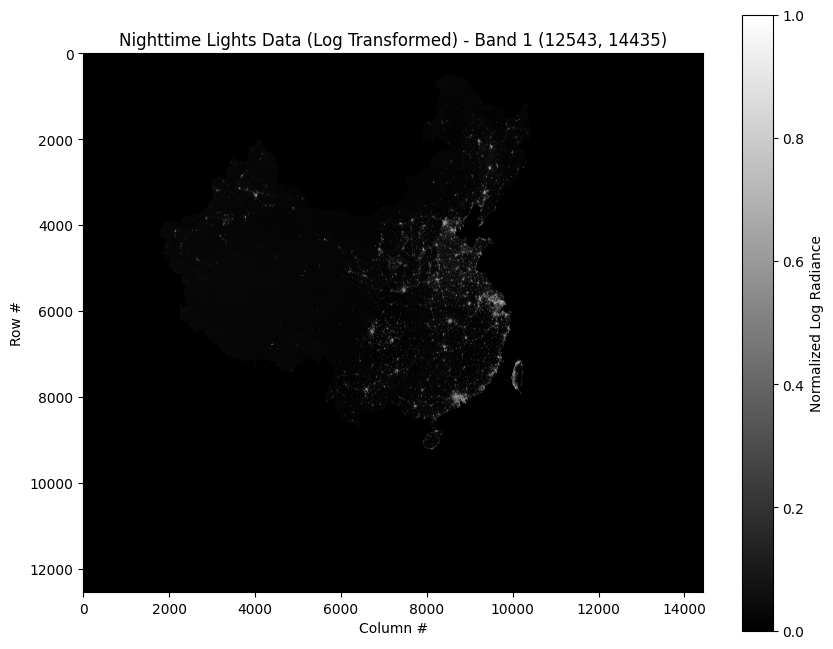

In [50]:
# 打开栅格数据文件
with rasterio.open(filepath) as src:
    # 获取概视图（overviews）
    oviews = src.overviews(1)
    if oviews:
        # 选择第一个概视图
        oview = oviews[0]
        print(f'Decimation factor = {oview}')
        # 按概视图的分辨率读取数据
        thumbnail = src.read(1, out_shape=(int(src.height // oview), int(src.width // oview)))
    else:
        print("Warning: No overviews found, using original resolution.")
        # 如果没有概视图，直接读取原始分辨率数据
        thumbnail = src.read(1)

    # 检查数据维度并去除多余的维度
    if thumbnail.ndim > 2:
        thumbnail = thumbnail.squeeze()

# 打印数据信息
print('Array shape:', thumbnail.shape)  # 应显示 (H, W)
print('Data range:', thumbnail.min(), thumbnail.max())
print("Data type:", thumbnail.dtype)  # 检查数据类型（关键！）
print("Min value:", np.nanmin(thumbnail))  # 忽略NaN的最小值
print("Max value:", np.nanmax(thumbnail))  # 忽略NaN的最大值

# 数据预处理：忽略无效值（NaN）
valid_mask = ~np.isnan(thumbnail)
thumbnail_valid = thumbnail[valid_mask]
# 对数变换
thumbnail_log = np.log1p(thumbnail)
thumbnail_log_norm = (thumbnail_log - np.nanmin(thumbnail_log)) / (np.nanmax(thumbnail_log) - np.nanmin(thumbnail_log))

# 可视化对数变换结果
plt.figure(figsize=(10, 8))
plt.imshow(thumbnail_log_norm, cmap='gray')
plt.colorbar(label='Normalized Log Radiance')
plt.title(f'Nighttime Lights Data (Log Transformed) - Band 1 {thumbnail.shape}')
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()

Array shape: (1000, 1000)
Data range: 0.0 116.91358
Data type: float32
Min value: 0.0
Max value: 116.91358


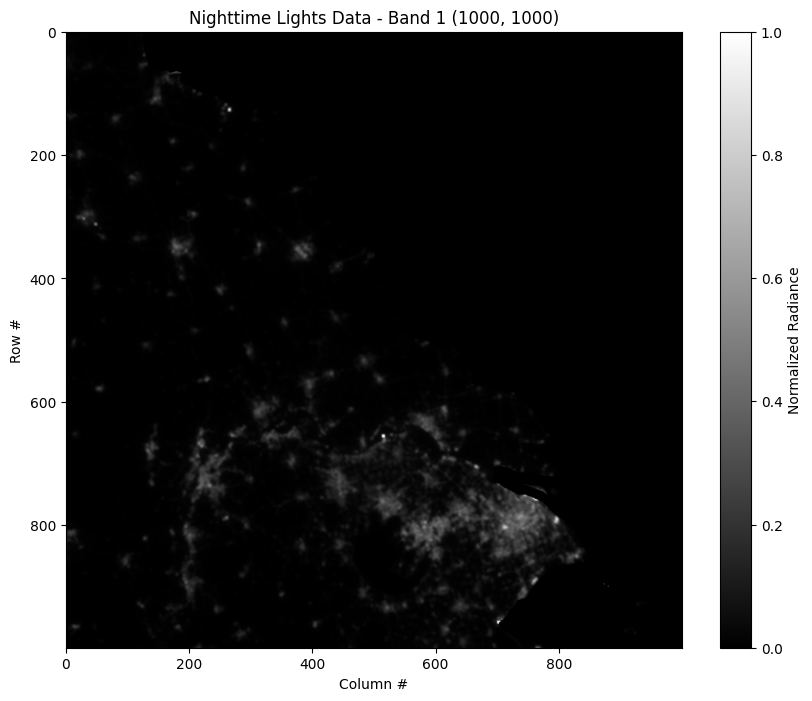

In [52]:
# 打开栅格数据文件
with rasterio.open(filepath) as src:
    # 定义像素范围（行范围和列范围）
    row_start, row_stop = 5000, 6000
    col_start, col_stop = 9000, 10000
# 读取指定窗口的数据
    thumbnail = src.read(1, window=((row_start, row_stop), (col_start, col_stop)))

    # 检查数据维度并去除多余的维度
    if thumbnail.ndim > 2:
        thumbnail = thumbnail.squeeze()

# 打印数据信息
print('Array shape:', thumbnail.shape)  # 应显示 (H, W)
print('Data range:', thumbnail.min(), thumbnail.max())
print("Data type:", thumbnail.dtype)  # 检查数据类型（关键！）
print("Min value:", np.nanmin(thumbnail))  # 忽略NaN的最小值
print("Max value:", np.nanmax(thumbnail))  # 忽略NaN的最大值

# 数据预处理：忽略无效值（NaN）
valid_mask = ~np.isnan(thumbnail)
thumbnail_valid = thumbnail[valid_mask]

# 数据归一化处理
thumbnail_norm = (thumbnail - np.nanmin(thumbnail)) / (np.nanmax(thumbnail) - np.nanmin(thumbnail))

# 可视化
plt.figure(figsize=(10, 8))
plt.imshow(thumbnail_norm, cmap='gray')
plt.colorbar(label='Normalized Radiance')
plt.title(f'Nighttime Lights Data - Band 1 {thumbnail.shape}')
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()